In [1]:
from laser_parallax import compute_world_point
import numpy as np
import matplotlib.pyplot as plt

In [2]:
distances = np.linspace(0.2, 5, 50)

In [3]:
sensor_size_px = np.array([4000, 3000])
pixel_pitch_mm = 0.0015
focal_length_mm = 4.5
laser_origin = np.array([0.1, 0, 0])
laser_axis = np.array([0, 0, 1])

camera_params = (focal_length_mm, sensor_size_px[0], sensor_size_px[1], pixel_pitch_mm)

In [4]:
plane_normal = np.array([0, 0, 1])
real_image_coordinates = []
quantized_image_coordinates = []
laser_dots = []
errors = []
world_coordinates = []
for distance in distances:
    plane_origin = np.array([0, 0, distance])
    laser_1_scalar = np.dot((plane_origin - laser_origin), plane_normal) / np.dot(laser_axis, plane_normal)
    laser_1_dot = laser_origin + laser_axis * laser_1_scalar
    laser_1_projection = -focal_length_mm / 1e3 / laser_1_dot[2] * laser_1_dot[0:2] / (pixel_pitch_mm / 1e3) # in pixels
    laser_1_projection_q = np.round(laser_1_projection)
    world_coordinate = compute_world_point(
        laser_origin=laser_origin,
        laser_axis=laser_axis,
        camera_params=camera_params,
        image_coordinate=laser_1_projection_q
    )
    error = np.linalg.norm(world_coordinate - laser_1_dot)
    errors.append(error)
    real_image_coordinates.append(laser_1_projection)
    quantized_image_coordinates.append(laser_1_projection_q)
    laser_dots.append(laser_1_dot)
    world_coordinates.append(world_coordinate)

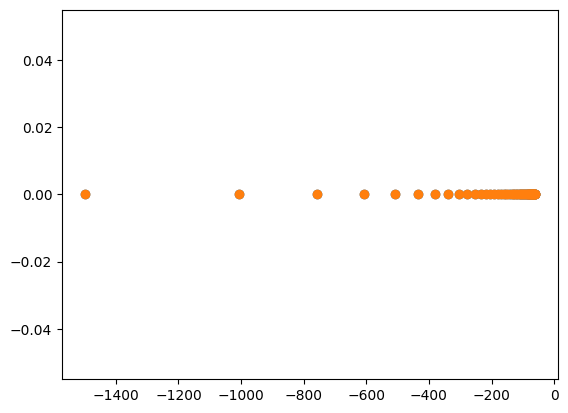

In [5]:
real_image_coordinates = np.array(real_image_coordinates)
quantized_image_coordinates = np.array(quantized_image_coordinates)
plt.scatter(real_image_coordinates[:,0], real_image_coordinates[:,1])
plt.scatter(quantized_image_coordinates[:,0], quantized_image_coordinates[:,1])

Text(0, 0.5, 'World coordinate error (m)')

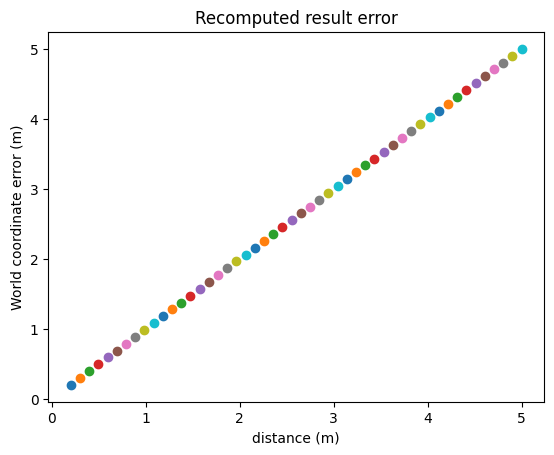

In [6]:
for i, error in enumerate(errors):
    plt.scatter(distances[i], error)
plt.title('Recomputed result error')
plt.xlabel('distance (m)')
plt.ylabel('World coordinate error (m)')

In [7]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# laser_dots = np.array(laser_dots)
# ax.scatter(laser_dots[:,0], laser_dots[:,1], laser_dots[:,2])

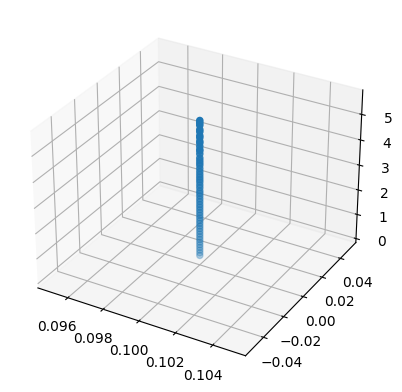

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
world_coordinates = np.array(world_coordinates)
ax.scatter(world_coordinates[:,0], world_coordinates[:,1], world_coordinates[:,2])

In [9]:
laser_dots

[array([0.1, 0. , 0.2]),
 array([0.1       , 0.        , 0.29795918]),
 array([0.1       , 0.        , 0.39591837]),
 array([0.1       , 0.        , 0.49387755]),
 array([0.1       , 0.        , 0.59183673]),
 array([0.1       , 0.        , 0.68979592]),
 array([0.1      , 0.       , 0.7877551]),
 array([0.1       , 0.        , 0.88571429]),
 array([0.1       , 0.        , 0.98367347]),
 array([0.1       , 0.        , 1.08163265]),
 array([0.1       , 0.        , 1.17959184]),
 array([0.1       , 0.        , 1.27755102]),
 array([0.1      , 0.       , 1.3755102]),
 array([0.1       , 0.        , 1.47346939]),
 array([0.1       , 0.        , 1.57142857]),
 array([0.1       , 0.        , 1.66938776]),
 array([0.1       , 0.        , 1.76734694]),
 array([0.1       , 0.        , 1.86530612]),
 array([0.1       , 0.        , 1.96326531]),
 array([0.1       , 0.        , 2.06122449]),
 array([0.1       , 0.        , 2.15918367]),
 array([0.1       , 0.        , 2.25714286]),
 array([0.1    

In [10]:
world_coordinates

array([[1.00000000e-01, 0.00000000e+00, 2.22222222e-08],
       [1.00000000e-01, 0.00000000e+00, 3.31016220e-08],
       [1.00000000e-01, 0.00000000e+00, 4.39753738e-08],
       [1.00000000e-01, 0.00000000e+00, 5.49148819e-08],
       [1.00000000e-01, 0.00000000e+00, 6.57462196e-08],
       [1.00000000e-01, 0.00000000e+00, 7.66283525e-08],
       [1.00000000e-01, 0.00000000e+00, 8.74890639e-08],
       [1.00000000e-01, 0.00000000e+00, 9.83284169e-08],
       [1.00000000e-01, 0.00000000e+00, 1.09289617e-07],
       [1.00000000e-01, 0.00000000e+00, 1.20336943e-07],
       [1.00000000e-01, 0.00000000e+00, 1.31233596e-07],
       [1.00000000e-01, 0.00000000e+00, 1.41843972e-07],
       [1.00000000e-01, 0.00000000e+00, 1.52905199e-07],
       [1.00000000e-01, 0.00000000e+00, 1.63398693e-07],
       [1.00000000e-01, 0.00000000e+00, 1.74520070e-07],
       [1.00000000e-01, 0.00000000e+00, 1.85185185e-07],
       [1.00000000e-01, 0.00000000e+00, 1.96078431e-07],
       [1.00000000e-01, 0.00000